# 📚 ДЗ №2: Работа с данными для LLM

## 🎯 Цель задания
После выполнения задания вы сможете:
- Предобрабатывать русскоязычные текстовые данные для LLM
- Работать с готовыми моделями HuggingFace для анализа тональности и NER
- Создавать эффективные промпты для LLM API
- Сравнивать качество работы разных подходов к анализу текста
- Формировать датасеты в формате instruction-following для fine-tuning
- Сохранять данные в правильных форматах для обучения LLM

## 📝 Структура задания
- **Часть 1** (35% оценки): Предобработка данных и работа с готовыми моделями
- **Часть 2** (35% оценки): LLM API и prompt engineering
- **Часть 3** (20% оценки): Подготовка данных для fine-tuning LLM
- **Часть 4** (10% оценки): Сравнительный анализ и визуализация

## ⚡ Критерии оценки
- Качество предобработки данных: 25%
- Корректность работы с готовыми моделями: 20%
- Эффективность промптов для LLM: 25%
- Правильность подготовки данных для fine-tuning: 20%
- Качество сравнительного анализа: 10%


## 🔧 Установка зависимостей

Установим необходимые библиотеки для работы с данными, готовыми моделями и LLM API.


In [1]:
%pip install pandas numpy matplotlib seaborn
%pip install transformers torch
%pip install openai>=1.0.0  # Для работы с OpenAI API
%pip install datasets
%pip install pymorphy2



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 77.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5975c196862e07a545ef7754743921fb63c31ec3d7b6e08d7ece80af0157b508
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt


In [2]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from typing import List, Dict, Tuple
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Библиотеки загружены успешно!")



Библиотеки загружены успешно!


## 📊 Часть 1: Предобработка данных и готовые модели (35% оценки)

### Задание 1.1: Анализ "грязного" датасета

Проанализируем реалистичный датасет с типичными проблемами: опечатки, разные регистры, лишние пробелы, эмодзи.


In [3]:
# Создаем "грязный" датасет с типичными проблемами реальных данных
# Включаем сложные случаи для демонстрации преимуществ LLM
raw_reviews = [
    # Простые случаи
    "отличный iphone 14 PRO!!!  купил в магазине  apple на тверской 😊. Камера супер",
    "УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров вобще не помог(",

    # Сарказм и ирония (сложно для классических моделей)
    "Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏",
    "Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился",

    # Смешанные эмоции
    "iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store",
    "Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен",

    # Сложная структура предложений
    "Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой",
    "Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги",

    # Контекстно-зависимые случаи
    "Заказал доставку в Яндекс.Еде из ресторана Дача на Рублевке - привезли холодное, но курьер Андрей был вежливый",
    "MacBook Pro 16 работает как часы уже год, покупал в iStore на Арбате у консультанта Елены",

    # Неоднозначные случаи
    "Сходил в кинотеатр Октябрь посмотреть новый фильм Marvel - ну такое себе, но попкорн вкусный был",
    "Обслуживание в банке ВТБ на Тверской оставляет желать лучшего, хотя менеджер Ольга старалась помочь",

    # Сложные именованные сущности
    "Купил новый Samsung Galaxy S24 Ultra в DNS на Ленинском проспекте, консультант Дмитрий Иванович всё объяснил",
    "Ужинал в ресторане White Rabbit на Смоленской площади - шеф-повар Владимир Мухин превзошел ожидания",

    # Опечатки и сленг
    "норм телек LG купил в эльдорадо, продавец норм чел был, всё рассказал про функции"
]

# TODO: Создайте DataFrame и проанализируйте проблемы в данных
# Создайте DataFrame из списка raw_reviews
# Добавьте колонку с правильными метками тональности для каждого отзыва
# Проанализируйте и выведите список проблем, которые вы видите в данных
# Подумайте: какие проблемы могут повлиять на качество анализа?

# Ваш код здесь:



### Вывод 1.1
- *Есть неоднозначные отзывы сразу с плюсами и минусами, сложно выдать оценку даже человеку, поэтому ставим - нейтральное.*
- *Есть отзывы с сарказмом - сложно понять, если модель обучалась на сарказм - все ок, если нет - могут быть ошибки.*
- *Есть опечатки и сленг, но для современных ллм - это не проблема.
Эмодзи и другие символы можно очистить.*

In [4]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 200)

In [5]:
gold_labels_hf = [
    "POSITIVE",
    "NEGATIVE",

    "NEGATIVE",  # сарказм про очередь
    "NEGATIVE",  # сарказм про пятёрочку

    "NEUTRAL",   # хороший, но цена кусается
    "NEUTRAL",   # красиво, но официант невнимателен

    "POSITIVE",  # дорого/иногда подводит, но в целом очень доволен (позитив преобладает)
    "NEUTRAL",   # не плохой, но ожидал большего

    "NEUTRAL",   # холодное, но курьер вежливый
    "POSITIVE",  # работает как часы

    "NEUTRAL",   # ну такое себе, но попкорн вкусный
    "NEUTRAL",   # желает лучшего, хотя менеджер старалась (амбивалентно)

    "POSITIVE",
    "POSITIVE",

    "POSITIVE"
]

df = pd.DataFrame({"raw_text": raw_reviews, "gold_sentiment": gold_labels_hf})

df["raw_len"] = df["raw_text"].astype(str).str.len()

df


,raw_text,gold_sentiment,raw_len
0,отличный iphone 14 PRO!!! купил в магазине apple на тверской 😊. Камера супер,POSITIVE,78
1,УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров вобще не помог(,NEGATIVE,90
2,Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏,NEGATIVE,96
3,"Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился",NEGATIVE,104
4,"iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store",NEUTRAL,80
5,"Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен",NEUTRAL,82
6,"Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой",POSITIVE,114
7,"Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги",NEUTRAL,85
8,"Заказал доставку в Яндекс.Еде из ресторана Дача на Рублевке - привезли холодное, но курьер Андрей был вежливый",NEUTRAL,110
9,"MacBook Pro 16 работает как часы уже год, покупал в iStore на Арбате у консультанта Елены",POSITIVE,89


### Задание 1.2: Очистка и нормализация данных


In [6]:
def clean_text(text: str) -> str:
    """
    Очистка и нормализация русскоязычного текста
    """
    # TODO: Реализуйте базовую очистку текста
    # Подумайте над следующими аспектами:
    # - Как убрать эмодзи и специальные символы?
    # - Как нормализовать пробелы и отступы?
    # - Нужно ли исправлять регистр? Как?
    # - Что делать с повторяющимися знаками препинания?
    # - Как разделить слитно написанные слова (например, iPhone14)?

    # Используйте регулярные выражения (модуль re)
    # Ваш код здесь:

    if text is None:
        return ""
    t = str(text)

    # "!!!" -> "!", ".." -> ".", "??!!" -> "?" убираем повторяющуюся пунктуацию
    t = re.sub(r"[!]{2,}", "!", t)
    t = re.sub(r"[?]{2,}", "?", t)
    t = re.sub(r"[.]{2,}", ".", t)
    t = re.sub(r"[,]{2,}", ",", t)
    t = re.sub(r"[:]{2,}", ":", t)
    t = re.sub(r"[;]{2,}", ";", t)

    # Удаляем лишние символы (кроме буквы/цифры/пробел/базовая пунктуация/дефис)
    t = re.sub(r"[^0-9A-Za-zА-Яа-яЁё\s\.\,\!\?\:\;\-\(\)\"'/%]", " ", t)

    # Удаляем парные пробелы
    t = re.sub(r"\s{2,}", " ", t).strip()

    # Добавляем или убираем пробелы вокруг пунктуации
    t = re.sub(r"\s+([.,!?;:])", r"\1", t)
    t = re.sub(r"([.,!?;:])([^\s])", r"\1 \2", t)

    t = t.strip()

    # lower() может быть полезен для тональности, но для NER лучше оригинальный регистр
    #t = t.lower()

    return t

# TODO: Примените функцию очистки к данным и сравните результаты
# Создайте новую колонку с очищенными текстами
# Сравните исходные и очищенные тексты

df["clean_text"] = df["raw_text"].apply(clean_text)
df["clean_len"] = df["clean_text"].astype(str).str.len()

df



,raw_text,gold_sentiment,raw_len,clean_text,clean_len
0,отличный iphone 14 PRO!!! купил в магазине apple на тверской 😊. Камера супер,POSITIVE,78,отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер,72
1,УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров вобще не помог(,NEGATIVE,90,УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(,89
2,Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏,NEGATIVE,96,Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно,94
3,"Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился",NEGATIVE,104,"Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился",104
4,"iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store",NEUTRAL,80,"iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re: Store",81
5,"Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен",NEUTRAL,82,"Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен",82
6,"Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой",POSITIVE,114,"Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой",114
7,"Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги",NEUTRAL,85,"Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги",85
8,"Заказал доставку в Яндекс.Еде из ресторана Дача на Рублевке - привезли холодное, но курьер Андрей был вежливый",NEUTRAL,110,"Заказал доставку в Яндекс. Еде из ресторана Дача на Рублевке - привезли холодное, но курьер Андрей был вежливый",111
9,"MacBook Pro 16 работает как часы уже год, покупал в iStore на Арбате у консультанта Елены",POSITIVE,89,"MacBook Pro 16 работает как часы уже год, покупал в iStore на Арбате у консультанта Елены",89


In [7]:
avg_raw = df["raw_len"].mean()
avg_clean = df["clean_len"].mean()

print(f"Средняя длина raw_len:   {avg_raw:.2f} символов")
print(f"Средняя длина clean_len: {avg_clean:.2f} символов")

Средняя длина raw_len:   94.07 символов
Средняя длина clean_len: 93.60 символов


### Вывод 1.2
Длина контекста немного сократилась за счет очистки данных.
Также можно сделать лемматизацию и удаление стоп-слов.

### Задание 1.3: Использование готовых моделей HuggingFace


In [8]:
# TODO: Загрузите готовые модели HuggingFace для анализа тональности и NER
# Исследуйте HuggingFace Hub и найдите подходящие русскоязычные модели для:
# - Анализа тональности (sentiment analysis)
# - Извлечения именованных сущностей (NER)
#
# Используйте функцию pipeline() из библиотеки transformers
# Обратите внимание на параметры модели и токенизатора

# Ваш код для загрузки моделей:

from typing import List, Dict, Any
import torch
import pandas as pd
from transformers import pipeline

device = 0 if torch.cuda.is_available() else -1

SENTIMENT_MODEL = "blanchefort/rubert-base-cased-sentiment"
NER_MODEL = "Gherman/bert-base-NER-Russian"

sentiment_pipe = pipeline(
    "sentiment-analysis",
    model=SENTIMENT_MODEL,
    tokenizer=SENTIMENT_MODEL,
    device=device
)

ner_pipe = pipeline(
    "ner",
    model=NER_MODEL,
    tokenizer=NER_MODEL,
    aggregation_strategy="simple",
    device=device
)

def analyze_with_huggingface(texts: List[str]) -> List[Dict]:
    """
    Анализ текстов с помощью готовых моделей HuggingFace
    """
    # TODO: Реализуйте функцию анализа
    # Для каждого текста:
    # 1. Примените модель анализа тональности
    # 2. Примените модель NER
    # 3. Соберите результаты в структурированном виде
    # 4. Верните список словарей с результатами
    sents = sentiment_pipe([str(t or "") for t in texts])
    ners = ner_pipe([str(t or "") for t in texts])

    out = []
    for text, s, n in zip(texts, sents, ners):
        label = s.get("label", "UNKNOWN")
        if isinstance(label, str) and label.startswith("LABEL_"):
            try:
                label = sentiment_pipe.model.config.id2label[int(label.split("_")[1])]
            except Exception:
                pass

        out.append({
            "text": text,
            "sentiment": {"label": str(label).upper(), "score": float(s.get("score", 0.0))},
            "ner": [{"text": e.get("word"), "label": e.get("entity_group") or e.get("entity"), "score": float(e.get("score", 0.0))} for e in n],
        })
    return out

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


### Эксперименты

In [9]:

# TODO: Протестируйте модели на очищенных данных
# Проанализируйте несколько текстов (для начала возьмите 3-5)
# Выведите результаты в понятном формате
# Проанализируйте качество работы моделей

sample = df["clean_text"].tolist()
gold = df["gold_sentiment"].tolist()
res = analyze_with_huggingface(sample)

for r, g in zip(res, gold):
    pred = r["sentiment"]["label"]
    ok = "✅" if pred == g else "❌"
    ents = "; ".join([f"{e['text']}:{e['label']}" for e in r["ner"]]) if r["ner"] else "-"

    print(r["text"])
    print(f"GOLD: {g} | PRED: {pred} ({r['sentiment']['score']:.3f}) {ok}")
    print(f"NER: {ents}")
    print("-" * 80)

acc = sum(r["sentiment"]["label"] == g for r, g in zip(res, gold)) / len(gold)
print(f"Accuracy sentiment ({SENTIMENT_MODEL}): {acc:.3f}")



отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
GOLD: POSITIVE | PRED: POSITIVE (0.942) ✅
NER: -
--------------------------------------------------------------------------------
УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(
GOLD: NEGATIVE | PRED: NEGATIVE (0.995) ✅
NER: иван:FIRST_NAME; петров:LAST_NAME
--------------------------------------------------------------------------------
Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно
GOLD: NEGATIVE | PRED: POSITIVE (0.981) ❌
NER: -
--------------------------------------------------------------------------------
Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился
GOLD: NEGATIVE | PRED: NEGATIVE (0.752) ✅
NER: Пятерочке:CITY
--------------------------------------------------------------------------------
iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в 

In [ ]:
res = analyze_with_huggingface(sample)

for r, g in zip(res, gold):
    pred = r["sentiment"]["label"]
    ok = "✅" if pred == g else "❌"
    ents = "; ".join([f"{e['text']}:{e['label']}" for e in r["ner"]]) if r["ner"] else "-"

    print(r["text"])
    print(f"GOLD: {g} | PRED: {pred} ({r['sentiment']['score']:.3f}) {ok}")
    print(f"NER: {ents}")
    print("-" * 80)

acc = sum(r["sentiment"]["label"] == g for r, g in zip(res, gold)) / len(gold)
print(f"Accuracy sentiment ({SENTIMENT_MODEL}): {acc:.3f}")

отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
GOLD: POSITIVE | PRED: POSITIVE (0.580) ✅
NER: -
--------------------------------------------------------------------------------
УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(
GOLD: NEGATIVE | PRED: POSITIVE (0.798) ❌
NER: иван:FIRST_NAME; петров:LAST_NAME
--------------------------------------------------------------------------------
Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно
GOLD: NEGATIVE | PRED: POSITIVE (0.780) ❌
NER: -
--------------------------------------------------------------------------------
Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился
GOLD: NEGATIVE | PRED: POSITIVE (0.783) ❌
NER: Пятерочке:CITY
--------------------------------------------------------------------------------
iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в 

### Вывод 1.3

Для **сентимент-анализа** с использованием конкретно сентимент-моделей лучшие результаты были у rubert-base-cased-sentiment (в сравнении с изначально проставленными метками)
- blanchefort/rubert-base-cased-sentiment - точность 0.533 = 53% (https://huggingface.co/blanchefort/rubert-base-cased-sentiment)
- seara/rubert-tiny2-russian-sentiment): 0.467 = 46% (https://huggingface.co/seara/rubert-tiny2-russian-sentiment)
- Harsha901/tinybert-imdb-sentiment-analysis-model: 0.400 =  40%(https://huggingface.co/Harsha901/tinybert-imdb-sentiment-analysis-model)
- Когда у tabularisai/multilingual-sentiment-analysis: 0.200 - всего 20% (https://huggingface.co/tabularisai/multilingual-sentiment-analysis)

Выбор осуществлялся среди моделей с фильтром по работе с русским языком.

Оставляем **blanchefort/rubert-base-cased-sentiment**
Но лучший результат около 50% кажется плохим, есть предположение, что ЛЛМ справится лучше.

Для **NER**
- модель bert-base-NER-Russian неплохо извлекает имена и фамилии, но с городом была проблема - в тексте имеется ввиду название отеля, а не город - CITY. Также есть некоторые неточности в извлечении улиц - STREET.
(https://huggingface.co/Gherman/bert-base-NER-Russian)

В других моделях для NER на руском языке результаты намного хуже - извлекает очень мало данных, к сожалению.

## 🤖 Часть 2: LLM API и Prompt Engineering (35% оценки)

### Задание 2.1: Создание эффективных промптов


In [10]:
def create_prompts_for_llm() -> Dict[str, str]:
    """
    Создание базовых промптов для разных задач (один промпт на задачу)
    """
    # TODO: Создайте эффективные промпты для NER и sentiment analysis
    # Подумайте о структуре хорошего промпта:
    # - Четкое описание задачи
    # - Примеры входных и выходных данных
    # - Формат ответа (JSON, текст и т.д.)
    # - Особые требования (например, для русского языка)

    # Создайте промпты для:
    # 1. Извлечения именованных сущностей (NER)
    # 2. Анализа тональности (sentiment analysis)

    ner_prompt = """Ты — система извлечения именованных сущностей (NER) для русскоязычных отзывов.
Задача: по тексту найти сущности и вернуть их в JSON.
Сущности:
- PERSON: имена/фамилии людей (Иван Петров, Елена, Дмитрий Иванович)
- ORG: компании/бренды/организации (Сбербанк, Яндекс, МТС и другие)
- LOC: города/улицы/площади/районы/адресные указания (Тверская, Красная площадь, Арбат, Ленинский проспект)

Правила:
- Работай только по тексту, ничего не выдумывай.
- Сохраняй написание сущности как в тексте (регистр, дефисы, точки).
- Если сущность повторяется, можно вернуть один раз.
- Не включай общие слова (телефон, магазин, ресторан) без имени/названия.
- Допускай составные названия.

Формат ответа: строго JSON без пояснений и без markdown.

Пример:
Вход: "УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров не помог"
Выход:
{"entities":[
  {"text":"сбербанке","type":"ORG"},
  {"text":"красной площади","type":"LOC"},
  {"text":"иван петров","type":"PERSON"}
]}

Текст для анализа:
"""

    sentiment_prompt = """Ты — классификатор тональности русскоязычных отзывов.

Задача: определить тональность текста по трем классам:
- POSITIVE: преимущественно положительная оценка
- NEGATIVE: преимущественно отрицательная оценка
- NEUTRAL: смешанные эмоции/амбивалентно/без явной оценки

Правила:
- Учитывай сарказм и иронию (похвала при негативном контексте = NEGATIVE).
- Если есть и плюсы и минусы без явного преобладания — NEUTRAL.
- Оценивай общий смысл, а не отдельные слова.
- Ничего не выдумывай.

Формат ответа: строго JSON без пояснений и без markdown.

Примеры:
Вход: "Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно"
Выход: {"label":"NEGATIVE","description":"сарказм: жалоба на очередь"}

Вход: "iPhone 13 хороший телефон, но цена кусается. В целом доволен"
Выход: {"label":"NEUTRAL","description":"есть и плюс и минус"}

Вход: "Камера супер, отличный телефон"
Выход: {"label":"POSITIVE","description":"явная похвала"}

Текст для анализа:
"""

    return {"ner": ner_prompt, "sentiment": sentiment_prompt}


In [11]:
# TODO: Протестируйте ваши промпты
# Выведите созданные промпты и оцените их качество
prompts = create_prompts_for_llm()

print(prompts["sentiment"])
print(prompts["ner"])

Ты — классификатор тональности русскоязычных отзывов.

Задача: определить тональность текста по трем классам:
- POSITIVE: преимущественно положительная оценка
- NEGATIVE: преимущественно отрицательная оценка
- NEUTRAL: смешанные эмоции/амбивалентно/без явной оценки

Правила:
- Учитывай сарказм и иронию (похвала при негативном контексте = NEGATIVE).
- Если есть и плюсы и минусы без явного преобладания — NEUTRAL.
- Оценивай общий смысл, а не отдельные слова.
- Ничего не выдумывай.

Формат ответа: строго JSON без пояснений и без markdown.

Примеры:
Вход: "Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно"
Выход: {"label":"NEGATIVE","description":"сарказм: жалоба на очередь"}

Вход: "iPhone 13 хороший телефон, но цена кусается. В целом доволен"
Выход: {"label":"NEUTRAL","description":"есть и плюс и минус"}

Вход: "Камера супер, отличный телефон"
Выход: {"label":"POSITIVE","description":"явная похвала"}

Текст для анализа:

Ты — система извлечени

In [12]:
SENTIMENT_SCHEMA = {
    "type": "object",
    "properties": {
        "label": {"type": "string", "enum": ["POSITIVE", "NEGATIVE", "NEUTRAL"]},
        "description": {"type": "string"}
    },
    "required": ["label", "description"],
    "additionalProperties": False
}

NER_SCHEMA = {
    "type": "object",
    "properties": {
        "entities": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "text": {"type": "string"},
                    "type": {"type": "string", "enum": ["PERSON", "ORG", "LOC"]}
                },
                "required": ["text", "type"],
                "additionalProperties": False
            }
        }
    },
    "required": ["entities"],
    "additionalProperties": False
}

In [13]:
!pip -q install openai

In [15]:
# TODO: Настройте OpenAI API
# Установите API ключ через переменные окружения
# Изучите документацию OpenAI API для Python
from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("Enter OPENAI_API_KEY: ")

Enter OPENAI_API_KEY: ··········


In [25]:
import os, json, re, time
from typing import List, Dict, Any
from openai import OpenAI

client = OpenAI()
# TODO: Реализуйте функции для работы с OpenAI API
# Создайте функции для:
# 1. Вызова OpenAI API с промптом
# 2. Обработки ответа от API
# 3. Анализа текстов с помощью ваших промптов

def call_openai_json(
    system_prompt: str,
    user_text: str,
    schema: Dict[str, Any],
    name: str,
    model: str = None,
    temperature: float = 0.1,
    max_completion_tokens: int = 500,
) -> Dict[str, Any]:

    model = model or os.getenv("OPENAI_MODEL", "gpt-4o-mini")
    completion = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt or ""},
            {"role": "user", "content": user_text or ""},
        ],
        temperature=temperature,
        max_completion_tokens=max_completion_tokens,
        response_format={
            "type": "json_schema",
            "json_schema": {"name": name, "schema": schema, "strict": True},
        },
    )
    msg = completion.choices[0].message

    return json.loads(msg.content)

def analyze_with_openai(texts: List[str], model: str = None) -> List[Dict[str, Any]]:
    out = []
    for t in texts:
        t = "" if t is None else str(t)
        sent = call_openai_json(prompts["sentiment"], t, SENTIMENT_SCHEMA, "sentiment", model=model, max_completion_tokens=200)
        ner = call_openai_json(prompts["ner"], t, NER_SCHEMA, "ner", model=model, max_completion_tokens=500)
        out.append({"text": t, "sentiment": sent, "ner": ner})
    return out

sample = df["clean_text"].tolist()
res = analyze_with_openai(sample)

for r in res:
    ents = "; ".join(f"{e['text']}:{e['type']}" for e in r["ner"]["entities"]) if r["ner"]["entities"] else "-"
    print(r["text"])
    print(f"SENTIMENT: {r['sentiment']['label']} | {r['sentiment']['description']}")
    print(f"NER: {ents}")
    print("-" * 80)

# Подумайте о:
# - Обработке ошибок API
# - Формате запроса и ответа
# - Параметрах модели (temperature, max_tokens)
#
# Протестируйте на нескольких текстах из датасета



отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
SENTIMENT: POSITIVE | явная похвала
NER: iphone 14 PRO:ORG; apple:ORG; тверской:LOC
--------------------------------------------------------------------------------
УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(
SENTIMENT: NEGATIVE | жалоба на ужасное обслуживание и отсутствие помощи
NER: сбербанке:ORG; красной площади:LOC; иван петров:PERSON
--------------------------------------------------------------------------------
Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно
SENTIMENT: NEGATIVE | сарказм: жалоба на очередь
NER: МТС:ORG
--------------------------------------------------------------------------------
Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился
SENTIMENT: NEGATIVE | жалоба на сервис и отсутствие извинений
NER: Пятерочке:ORG
----------------------------------

### Задание 2.2: Сравнение результатов HuggingFace vs LLM


In [26]:
# TODO: Сравните результаты HuggingFace моделей с LLM на одних и тех же текстах
# Создайте сравнительный анализ:
# 1. Соберите результаты обеих подходов в структурированном виде
# 2. Сравните точность анализа тональности
# 3. Сравните качество извлечения сущностей
# 4. Проанализируйте время выполнения
# 5. Оцените простоту использования
#
# Создайте визуализации для сравнения:
# - Точность по разным метрикам
# - Время обработки
# - Количество найденных сущностей
#
# Сделайте выводы о том, когда лучше использовать каждый подход

In [27]:
import time, re
import pandas as pd

N = min(10, len(df))
texts = df["clean_text"].head(N).tolist()
gold = df["gold_sentiment"].head(N).tolist()

t0 = time.perf_counter()
hf_res = analyze_with_huggingface(texts)
hf_time = time.perf_counter() - t0

t0 = time.perf_counter()
llm_res = analyze_with_openai(texts)
llm_time = time.perf_counter() - t0

def _norm_ent(s: str) -> str:
    s = (s or "").strip().lower()
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"[^\w\s\-.:]", "", s)
    return s

hf_labels = [r.get("sentiment", {}).get("label", "UNKNOWN") for r in hf_res]
llm_labels = [r.get("sentiment", {}).get("label", "UNKNOWN") for r in llm_res]

hf_ent_sets = [set(_norm_ent(e.get("text")) for e in r.get("ner", []) if e.get("text")) for r in hf_res]
llm_ent_sets = [set(_norm_ent(e.get("text")) for e in r.get("ner", {}).get("entities", []) if e.get("text")) for r in llm_res]

hf_ent_counts = [len(s) for s in hf_ent_sets]
llm_ent_counts = [len(s) for s in llm_ent_sets]

jacc = []
for a, b in zip(hf_ent_sets, llm_ent_sets):
    u = len(a | b)
    jacc.append((len(a & b) / u) if u else 1.0)

df_compare = pd.DataFrame({
    "text": texts,
    "gold": gold,
    "hf_label": hf_labels,
    "llm_label": llm_labels,
    "hf_correct": [p == g for p, g in zip(hf_labels, gold)],
    "llm_correct": [p == g for p, g in zip(llm_labels, gold)],
    "hf_entities": hf_ent_counts,
    "llm_entities": llm_ent_counts,
    "ner_jaccard": jacc,
})

idx = df.index[:N]
df.loc[idx, "hf_label"] = hf_labels
df.loc[idx, "llm_label"] = llm_labels
df.loc[idx, "hf_entities"] = hf_ent_counts
df.loc[idx, "llm_entities"] = llm_ent_counts
df.loc[idx, "ner_jaccard"] = jacc

def _sent_count(labels):
    cats = ["POSITIVE", "NEUTRAL", "NEGATIVE"]
    m = {c: 0 for c in cats}
    for x in labels:
        x = (x or "UNKNOWN").upper()
        if x in m:
            m[x] += 1
    return [m[c] for c in cats], cats

def _acc(y_true, y_pred):
    return sum(a == b for a, b in zip(y_true, y_pred)) / max(1, len(y_true))

def _macro_f1(y_true, y_pred, labels=("POSITIVE", "NEGATIVE", "NEUTRAL")):
    f1s = []
    for c in labels:
        tp = sum((yt == c) and (yp == c) for yt, yp in zip(y_true, y_pred))
        fp = sum((yt != c) and (yp == c) for yt, yp in zip(y_true, y_pred))
        fn = sum((yt == c) and (yp != c) for yt, yp in zip(y_true, y_pred))
        p = tp / (tp + fp) if (tp + fp) else 0.0
        r = tp / (tp + fn) if (tp + fn) else 0.0
        f1 = (2 * p * r / (p + r)) if (p + r) else 0.0
        f1s.append(f1)
    return sum(f1s) / len(f1s)

hf_acc = _acc(gold, hf_labels)
llm_acc = _acc(gold, llm_labels)
hf_f1 = _macro_f1(gold, hf_labels)
llm_f1 = _macro_f1(gold, llm_labels)

print(df_compare[["gold", "hf_label", "hf_correct", "llm_label", "llm_correct", "hf_entities", "llm_entities", "ner_jaccard"]])
print(f"HF  accuracy={hf_acc:.3f}  macro_f1={hf_f1:.3f}  time={hf_time:.2f}s  avg_entities={sum(hf_ent_counts)/N:.2f}")
print(f"LLM accuracy={llm_acc:.3f}  macro_f1={llm_f1:.3f}  time={llm_time:.2f}s  avg_entities={sum(llm_ent_counts)/N:.2f}")
print(f"Avg NER Jaccard(HF vs LLM)={sum(jacc)/N:.3f}")


       gold  hf_label  hf_correct llm_label  llm_correct  hf_entities  llm_entities  ner_jaccard
0  POSITIVE  POSITIVE        True  POSITIVE         True            0             3     0.000000
1  NEGATIVE  NEGATIVE        True  NEGATIVE         True            2             3     0.000000
2  NEGATIVE  POSITIVE       False  NEGATIVE         True            0             1     0.000000
3  NEGATIVE  NEGATIVE        True  NEGATIVE         True            1             1     1.000000
4   NEUTRAL  POSITIVE       False   NEUTRAL         True            0             2     0.000000
5   NEUTRAL  POSITIVE       False   NEUTRAL         True            2             2     1.000000
6  POSITIVE  POSITIVE        True   NEUTRAL        False            0             2     0.000000
7   NEUTRAL   NEUTRAL        True   NEUTRAL         True            4             1     0.000000
8   NEUTRAL  POSITIVE       False   NEUTRAL         True            3             4     0.166667
9  POSITIVE   NEUTRAL       Fa

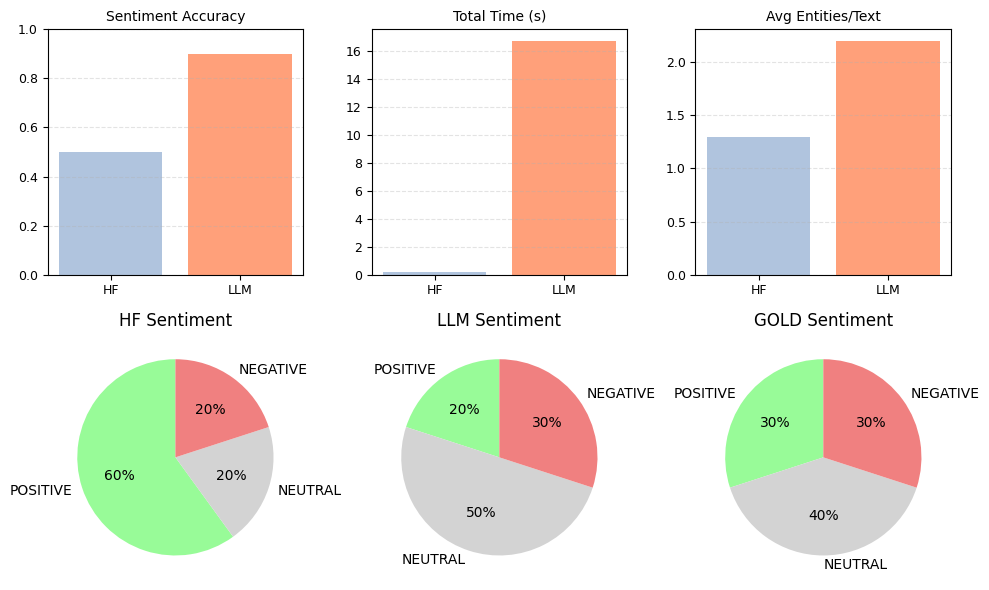

In [33]:
import matplotlib.pyplot as plt

hf_counts, cats = _sent_count(hf_labels)
llm_counts, _ = _sent_count(llm_labels)
gold_counts, _ = _sent_count(gold)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0, 0].bar(["HF", "LLM"], [hf_acc, llm_acc], color=["lightsteelblue", "lightsalmon"])
axes[0, 0].set_title("Sentiment Accuracy", fontsize=10)
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.35)

axes[0, 1].bar(["HF", "LLM"], [hf_time, llm_time], color=["lightsteelblue", "lightsalmon"])
axes[0, 1].set_title("Total Time (s)", fontsize=10)
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.35)

axes[0, 2].bar(["HF", "LLM"], [sum(hf_ent_counts)/N, sum(llm_ent_counts)/N], color=["lightsteelblue", "lightsalmon"])
axes[0, 2].set_title("Avg Entities/Text", fontsize=10)
axes[0, 2].grid(axis="y", linestyle="--", alpha=0.35)

pie_colors = ["palegreen", "lightgrey", "lightcoral"]

axes[1, 0].pie(hf_counts, labels=cats, autopct="%1.0f%%", startangle=90, colors=pie_colors)
axes[1, 0].set_title("HF Sentiment")

axes[1, 1].pie(llm_counts, labels=cats, autopct="%1.0f%%", startangle=90, colors=pie_colors)
axes[1, 1].set_title("LLM Sentiment")

axes[1, 2].pie(gold_counts, labels=cats, autopct="%1.0f%%", startangle=90, colors=pie_colors)
axes[1, 2].set_title("GOLD Sentiment")


for ax in axes[0, :]:
    ax.tick_params(axis="both", labelsize=9)

plt.tight_layout()
plt.show()


In [34]:
df_compare['text']

,text
0,отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
1,УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(
2,Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно
3,"Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился"
4,"iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re: Store"
5,"Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен"
6,"Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой"
7,"Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги"
8,"Заказал доставку в Яндекс. Еде из ресторана Дача на Рублевке - привезли холодное, но курьер Андрей был вежливый"
9,"MacBook Pro 16 работает как часы уже год, покупал в iStore на Арбате у консультанта Елены"


In [35]:
hf_ent_sets

[set(),
 {'иван', 'петров'},
 set(),
 {'пятерочке'},
 set(),
 {'белуга', 'максим'},
 set(),
 {'-', 'итц', 'карлтон', 'р'},
 {'андрей', 'левке', 'руб'},
 {'елены'}]

In [36]:
llm_ent_sets

[{'apple', 'iphone 14 pro', 'тверской'},
 {'иван петров', 'красной площади', 'сбербанке'},
 {'мтс'},
 {'пятерочке'},
 {'iphone 13', 're: store'},
 {'белуга', 'максим'},
 {'tesla model y', 'рольф премиум'},
 {'ритц-карлтон'},
 {'андрей', 'дача', 'рублевке', 'яндекс. еде'},
 {'istore', 'арбате', 'елены'}]

### Вывод 2.2

**accuracy** — доля текстов, где модель угадала ровно тот же класс, что и gold_sentiment.

HF 0.500 = угадала 5 из 10 (если N=10).

LLM 0.800 = угадала 8 из 10.

**macro_f1**— средний F1 по классам POSITIVE/NEGATIVE/NEUTRAL.
Полезно, когда классы несбалансированы: модель может иметь неплохую accuracy, но плохо угадывать редкий класс — macro_f1 это покажет.

HF 0.526 — в среднем по классам качество среднее.

LLM 0.802 — по классам качество заметно лучше.

**time** — сколько заняла обработка всего N текстов.

HF 0.24s — очень быстро локально (модель маленькая/на GPU/без сети).

LLM 25.13s — медленно из-за сети + latency + 2 запроса на текст (sentiment и NER).

**avg_entities** — среднее число извлечённых сущностей на текст.

HF 1.30 — в среднем нашёл меньше сущностей.

LLM 2.10 — в среднем находит больше сущностей (но мб и больше шума).

**Avg NER Jaccard(HF vs LLM)**=0.250 — насколько совпадают между собой два подхода по множеству найденных сущностей.

Значения коэффициента Жаккарда варьируются от 0 до 1:
- 0 — множества не имеют общих элементов.
- 1 — множества идентичны.

Jaccard = |пересечение| / |объединение|.
0.25 значит: совпадений мало (много различий: кто-то не нашёл, кто-то нашёл другое, разные формы написания).
Но в идеале, чтобы оценить качество NER, нужны размеченные сущности.


**Вывод**
- Специализированные модели на сентимент или NER с HF лучше, когда нужна скорость, дешёвая массовая обработка и простые типовые задачи и тексты. На инференсе (не считая загрузки модели - результаты получаются почти моментально).
- LLM лучше, когда важна точность на сложных формулировках (сарказм, неоднозначность), но здесь нужно быть готовым к долгому ожиданию ответа.

In [37]:
### Задание 2.3: Анализ сложных случаев

# Выберем специально сложные примеры для демонстрации преимуществ LLM
complex_cases = [
    "Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏",
    "iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store",
    "Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой",
    "норм телек LG купил в эльдорадо, продавец норм чел был, всё рассказал про функции"
]

print("Анализ сложных случаев:")
print("=" * 60)

# TODO: Сравните результаты HuggingFace и OpenAI на сложных случаях
# for i, text in enumerate(complex_cases):
#     print(f"\nПример {i+1}: {text}")
#     # hf_result = sentiment_pipeline(text)
#     # openai_result = analyze_with_openai([text])
#     # print(f"HuggingFace: {hf_result}")
#     # print(f"OpenAI: {openai_result}")

hf_res = analyze_with_huggingface(complex_cases)
llm_res = analyze_with_openai(complex_cases)

for i, (text, hf, llm) in enumerate(zip(complex_cases, hf_res, llm_res), 1):
    hf_sent = hf["sentiment"]["label"]
    hf_score = hf["sentiment"]["score"]
    llm_sent = llm["sentiment"]["label"]
    llm_rat = llm["sentiment"].get("description", "")

    hf_ents = "; ".join([f"{e['text']}:{e['label']}" for e in hf["ner"]]) if hf["ner"] else "-"
    llm_ents = "; ".join([f"{e['text']}:{e['type']}" for e in llm["ner"]["entities"]]) if llm["ner"]["entities"] else "-"

    print(f"\nПример {i}: {text}")
    print(f"HF sentiment:  {hf_sent} ({hf_score:.3f})")
    print(f"LLM sentiment: {llm_sent} | {llm_rat}")
    print(f"HF NER:  {hf_ents}")
    print(f"LLM NER: {llm_ents}")

Анализ сложных случаев:

Пример 1: Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏
HF sentiment:  POSITIVE (0.981)
LLM sentiment: NEGATIVE | сарказм: жалоба на очередь
HF NER:  -
LLM NER: МТС:ORG

Пример 2: iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store
HF sentiment:  POSITIVE (0.976)
LLM sentiment: NEUTRAL | есть и плюс и минус
HF NER:  -
LLM NER: iPhone 13:ORG; re:Store:ORG

Пример 3: Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой
HF sentiment:  POSITIVE (0.977)
LLM sentiment: NEUTRAL | есть и плюс и минус
HF NER:  -
LLM NER: Tesla Model Y:ORG; Рольф Премиум:ORG

Пример 4: норм телек LG купил в эльдорадо, продавец норм чел был, всё рассказал про функции
HF sentiment:  POSITIVE (0.953)
LLM sentiment: POSITIVE | положительная оценка телевизора и продавца
HF NER:  -
LLM NER: LG:ORG; эльдорадо:ORG; чел:PERSON


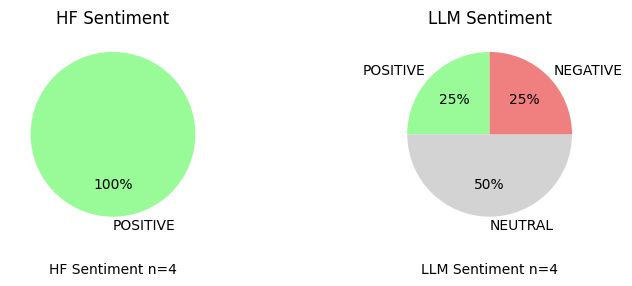

In [42]:
hf_labels_cc = [(r.get("sentiment", {}).get("label") or "").upper().strip() for r in hf_res]
llm_labels_cc = [(r.get("sentiment", {}).get("label") or "").upper().strip() for r in llm_res]

hf_counts_cc, cats = _sent_count(hf_labels_cc)
llm_counts_cc, _ = _sent_count(llm_labels_cc)

def _pie(ax, counts, title):
    nonzero = [(c, k) for c, k in zip(counts, cats) if c > 0]
    vals = [c for c, _ in nonzero]
    labs = [k for _, k in nonzero]

    if len(vals) == 1:
        ax.pie(vals, labels=labs, startangle=90, colors=["palegreen"], autopct="%1.0f%%")
    else:
        ax.pie(vals, labels=labs, startangle=90, colors=["palegreen", "lightgrey", "lightcoral"][:len(vals)],
               autopct="%1.0f%%")
    ax.set_title(title)
    ax.text(0.5, -0.12, f"{title} n={sum(counts)}", transform=ax.transAxes,
            ha="center", va="top", fontsize=10)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
_pie(axes[0], hf_counts_cc, "HF Sentiment")
_pie(axes[1], llm_counts_cc, "LLM Sentiment")
plt.tight_layout()
plt.show()


### Вывод 2.3
На сложных примерах LLM лучше понимает контекст и смешанную тональность: распознало сарказм как NEGATIVE и плюсы+минусы как NEUTRAL, тогда как HF почти везде поставил POSITIVE.

По NER HF в этих примерах вообще не нашёл сущности, а LLM стабильно выделил бренды/организации (МТС, re:Store, Tesla, Рольф, LG, Эльдорадо).

Вывод: для сарказма, неоднозначных отзывов и извлечения сущностей из текста LLM лучше, но модели с HF остаются быстрым и неплохим решением для простых случаев.

## 📚 Часть 3: Подготовка данных для Fine-tuning LLM (20% оценки)

### Задание 3.1: Создание instruction-following датасета


In [43]:
### Задание 2.4: Количественное сравнение точности

# Создаем расширенный набор для тестирования с правильными ответами
test_cases_with_labels = [
    # Сарказм и ирония - должны быть NEGATIVE
    ("Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏", "NEGATIVE"),
    ("Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился", "NEGATIVE"),

    # Смешанные эмоции - должны быть NEUTRAL или зависеть от преобладающего тона
    ("iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store", "NEUTRAL"),
    ("Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен", "NEUTRAL"),

    # Сложные структуры - требуют понимания контекста
    ("Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой", "POSITIVE"),
    ("Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги", "NEUTRAL"),

    # Неформальная речь и сленг
    ("норм телек LG купил в эльдорадо, продавец норм чел был, всё рассказал про функции", "POSITIVE"),
    ("Сходил в кинотеатр Октябрь посмотреть новый фильм Marvel - ну такое себе, но попкорн вкусный был", "NEUTRAL"),

    # Простые случаи для контроля
    ("отличный iphone 14 PRO!!! купил в магазине apple на тверской 😊. Камера супер", "POSITIVE"),
    ("УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров вобще не помог(", "NEGATIVE")
]

# TODO: Рассчитайте точность для каждой модели
# hf_correct = 0
# openai_correct = 0
# total = len(test_cases_with_labels)
hf_correct = 0
openai_correct = 0
total = len(test_cases_with_labels)

for i, (text, gold) in enumerate(test_cases_with_labels, 1):
    hf_pred = analyze_with_huggingface([text])[0]["sentiment"]["label"]
    llm_pred = analyze_with_openai([text])[0]["sentiment"]["label"]

    hf_ok = hf_pred == gold
    llm_ok = llm_pred == gold
    hf_correct += hf_ok
    openai_correct += llm_ok

    print(f"\nПример {i}: {text}")
    print(f"GOLD: {gold}")
    print(f"HF:   {hf_pred} {'✅' if hf_ok else '❌'}")
    print(f"LLM:  {llm_pred} {'✅' if llm_ok else '❌'}")

print(f"\nHF accuracy: {hf_correct}/{total} = {hf_correct/total:.3f}")
print(f"LLM accuracy: {openai_correct}/{total} = {openai_correct/total:.3f}")



Пример 1: Спасибо огромное сотрудникам МТС за то что 3 часа держали меня в очереди! Просто восхитительно 👏
GOLD: NEGATIVE
HF:   POSITIVE ❌
LLM:  NEGATIVE ✅

Пример 2: Какой замечательный сервис в Пятерочке - касса сломалась прямо передо мной, а персонал даже не извинился
GOLD: NEGATIVE
HF:   NEGATIVE ✅
LLM:  NEGATIVE ✅

Пример 3: iPhone 13 хороший телефон, но цена кусается. В целом доволен покупкой в re:Store
GOLD: NEUTRAL
HF:   POSITIVE ❌
LLM:  NEUTRAL ✅

Пример 4: Ресторан Белуга красивый и атмосфера приятная, но официант Максим был невнимателен
GOLD: NEUTRAL
HF:   POSITIVE ❌
LLM:  NEUTRAL ✅


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Пример 5: Хотя Tesla Model Y и дорогая машина, и сервис в Рольф Премиум иногда подводит, но в целом я очень доволен покупкой
GOLD: POSITIVE
HF:   POSITIVE ✅
LLM:  NEUTRAL ❌

Пример 6: Не могу сказать что отель Ритц-Карлтон плохой, просто ожидал большего за такие деньги
GOLD: NEUTRAL
HF:   NEUTRAL ✅
LLM:  NEUTRAL ✅

Пример 7: норм телек LG купил в эльдорадо, продавец норм чел был, всё рассказал про функции
GOLD: POSITIVE
HF:   POSITIVE ✅
LLM:  POSITIVE ✅

Пример 8: Сходил в кинотеатр Октябрь посмотреть новый фильм Marvel - ну такое себе, но попкорн вкусный был
GOLD: NEUTRAL
HF:   NEUTRAL ✅
LLM:  NEUTRAL ✅

Пример 9: отличный iphone 14 PRO!!! купил в магазине apple на тверской 😊. Камера супер
GOLD: POSITIVE
HF:   POSITIVE ✅
LLM:  POSITIVE ✅

Пример 10: УЖАСНОЕ обслуживание в сбербанке на красной площади.. менеджер иван петров вобще не помог(
GOLD: NEGATIVE
HF:   NEGATIVE ✅
LLM:  NEGATIVE ✅

HF accuracy: 7/10 = 0.700
LLM accuracy: 9/10 = 0.900


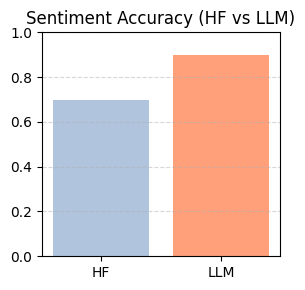

In [53]:
### Задание 2.5: Визуализация сравнения моделей

import matplotlib.pyplot as plt
import numpy as np

# TODO: Создайте визуализацию сравнения точности моделей
# plt.figure(figsize=(12, 8))
# # Создайте графики сравнения

hf_acc = hf_correct / total
llm_acc = openai_correct / total

plt.figure(figsize=(3, 3))
bars = plt.bar(["HF", "LLM"], [hf_acc, llm_acc], color=["lightsteelblue", "lightsalmon"])
plt.ylim(0, 1)
plt.title("Sentiment Accuracy (HF vs LLM)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# TODO: Создайте структурированный датасет для fine-tuning LLM
# Подумайте о структуре instruction-following датасета:
# - Какие поля должны быть в каждом примере?
# - Как сформулировать инструкции для модели?
# - Какие типы задач включить (sentiment, NER, etc.)?
# - Как структурировать ответы модели?
#
# Создайте несколько примеров для разных задач



# TODO: Протестируйте созданный датасет
# Создайте и проанализируйте instruction dataset
# Выведите примеры в читаемом формате
# Проанализируйте распределение типов задач



In [45]:
from typing import List, Dict
import pandas as pd

def create_instruction_dataset(df: pd.DataFrame) -> List[Dict]:
    """
    Создание датасета в формате instruction-following для fine-tuning LLM
    """
    raw_texts = df["raw_text"].tolist() if "raw_text" in df.columns else df["clean_text"].tolist()
    llm = analyze_with_openai(raw_texts)

    out = []
    for row, llm_r in zip(df.to_dict("records"), llm):
        sent = str(row.get("gold_sentiment", "NEUTRAL")).upper()
        input_text = str(row.get("clean_text") or row.get("raw_text") or "")
        ents = llm_r.get("ner", {}).get("entities", []) or []

        out.append({
            "task": "sentiment",
            "instruction": "Определи тональность отзыва: POSITIVE, NEGATIVE или NEUTRAL. Учитывай сарказм и смешанные эмоции. Верни строго JSON.",
            "input": input_text,
            "output": {"label": sent}
        })
        out.append({
            "task": "ner",
            "instruction": "Извлеки именованные сущности из текста. Типы: PERSON, ORG, LOC. Ничего не выдумывай. Верни строго JSON.",
            "input": input_text,
            "output": {"entities": ents}
        })
        out.append({
            "task": "sentiment+ner",
            "instruction": "Определи тональность (POSITIVE/NEGATIVE/NEUTRAL) и извлеки сущности PERSON/ORG/LOC. Верни строго JSON.",
            "input": input_text,
            "output": {"label": sent, "entities": ents}
        })
    return out

instruction_ds = create_instruction_dataset(df)

print("Total examples:", len(instruction_ds))
print(pd.Series([x["task"] for x in instruction_ds]).value_counts())

for ex in instruction_ds[:6]:
    print(ex["task"], "| entities:", len(ex["output"].get("entities", [])))
    print("INPUT:", ex["input"])
    print("OUTPUT:", ex["output"])
    print("-" * 80)


Total examples: 45
sentiment        15
ner              15
sentiment+ner    15
Name: count, dtype: int64
sentiment | entities: 0
INPUT: отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
OUTPUT: {'label': 'POSITIVE'}
--------------------------------------------------------------------------------
ner | entities: 3
INPUT: отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
OUTPUT: {'entities': [{'text': 'iphone 14 PRO', 'type': 'ORG'}, {'text': 'apple', 'type': 'ORG'}, {'text': 'тверской', 'type': 'LOC'}]}
--------------------------------------------------------------------------------
sentiment+ner | entities: 3
INPUT: отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер
OUTPUT: {'label': 'POSITIVE', 'entities': [{'text': 'iphone 14 PRO', 'type': 'ORG'}, {'text': 'apple', 'type': 'ORG'}, {'text': 'тверской', 'type': 'LOC'}]}
--------------------------------------------------------------------------------
sentiment | entitie

### Задание 3.2: Сериализация данных в формате для LLM платформ


In [55]:

# TODO: Реализуйте сохранение данных в форматах для fine-tuning
# Создайте функции для сохранения данных в форматах:
# 1. JSONL формат для OpenAI fine-tuning API
# 2. CSV формат для общего использования
#
# Изучите требования к форматам:
# - Какая структура нужна для OpenAI fine-tuning?
# - Как правильно структурировать messages?
# - Какие поля обязательны?
#
# Протестируйте сохранение и загрузку данных

import json
import pandas as pd
from typing import List, Dict, Any

def save_openai_jsonl(dataset: List[Dict[str, Any]], path: str) -> None:
    with open(path, "w", encoding="utf-8") as f:
        for ex in dataset:
            messages = [
                {"role": "system", "content": "Ты полезный ассистент. Отвечай строго в требуемом формате."},
                {"role": "user", "content": f"{ex['instruction']}\n\nТекст: {ex['input']}"},
                {"role": "assistant", "content": json.dumps(ex["output"], ensure_ascii=False)}
            ]
            f.write(json.dumps({"messages": messages}, ensure_ascii=False) + "\n")

def save_dataset_csv(dataset: List[Dict[str, Any]], path: str) -> None:
    rows = []
    for ex in dataset:
        rows.append({
            "task": ex.get("task"),
            "instruction": ex.get("instruction"),
            "input": ex.get("input"),
            "output_json": json.dumps(ex.get("output"), ensure_ascii=False),
        })
    pd.DataFrame(rows).to_csv(path, index=False, encoding="utf-8")

def load_openai_jsonl(path: str) -> List[Dict[str, Any]]:
    out = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                out.append(json.loads(line))
    return out

def load_dataset_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

jsonl_path = "instruction_dataset_openai.jsonl"
csv_path = "instruction_dataset.csv"

save_openai_jsonl(instruction_ds, jsonl_path)
save_dataset_csv(instruction_ds, csv_path)

print("JSONL sample:", load_openai_jsonl(jsonl_path)[0])
print("CSV sample:")
display(load_dataset_csv(csv_path).head())



JSONL sample: {'messages': [{'role': 'system', 'content': 'Ты полезный ассистент. Отвечай строго в требуемом формате.'}, {'role': 'user', 'content': 'Определи тональность отзыва: POSITIVE, NEGATIVE или NEUTRAL. Учитывай сарказм и смешанные эмоции. Верни строго JSON.\n\nТекст: отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер'}, {'role': 'assistant', 'content': '{"label": "POSITIVE"}'}]}
CSV sample:


,task,instruction,input,output_json
0,sentiment,"Определи тональность отзыва: POSITIVE, NEGATIVE или NEUTRAL. Учитывай сарказм и смешанные эмоции. Верни строго JSON.",отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер,"{""label"": ""POSITIVE""}"
1,ner,"Извлеки именованные сущности из текста. Типы: PERSON, ORG, LOC. Ничего не выдумывай. Верни строго JSON.",отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер,"{""entities"": [{""text"": ""iphone 14 PRO"", ""type"": ""ORG""}, {""text"": ""apple"", ""type"": ""ORG""}, {""text"": ""тверской"", ""type"": ""LOC""}]}"
2,sentiment+ner,Определи тональность (POSITIVE/NEGATIVE/NEUTRAL) и извлеки сущности PERSON/ORG/LOC. Верни строго JSON.,отличный iphone 14 PRO! купил в магазине apple на тверской. Камера супер,"{""label"": ""POSITIVE"", ""entities"": [{""text"": ""iphone 14 PRO"", ""type"": ""ORG""}, {""text"": ""apple"", ""type"": ""ORG""}, {""text"": ""тверской"", ""type"": ""LOC""}]}"
3,sentiment,"Определи тональность отзыва: POSITIVE, NEGATIVE или NEUTRAL. Учитывай сарказм и смешанные эмоции. Верни строго JSON.",УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(,"{""label"": ""NEGATIVE""}"
4,ner,"Извлеки именованные сущности из текста. Типы: PERSON, ORG, LOC. Ничего не выдумывай. Верни строго JSON.",УЖАСНОЕ обслуживание в сбербанке на красной площади. менеджер иван петров вобще не помог(,"{""entities"": [{""text"": ""сбербанке"", ""type"": ""ORG""}, {""text"": ""красной площади"", ""type"": ""LOC""}, {""text"": ""иван петров"", ""type"": ""PERSON""}]}"
